# # BƯỚC 3: KHAI PHÁ LUẬT KẾT HỢP VỚI FP-GROWTH
# 
# **Mục tiêu:**
# - Áp dụng thuật toán FP-Growth để tìm tập phổ biến
# - So sánh hiệu suất với Apriori
# - Sinh luật kết hợp với các chỉ số support, confidence, lift
# - Trực quan hóa kết quả
# 
# **Tham số mặc định:**
# - min_support = 0.01 (1%)
# - min_confidence = 0.3 (30%)
# - min_lift = 1.2

In [1]:
import sys
sys.path.append('../src')

from apriori_library import FPGrowthMiner, DataVisualizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Thiết lập style cho biểu đồ
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
# Tải basket boolean từ Lab 1
basket_bool = pd.read_parquet('../data/processed/basket_bool.parquet')
print(f"Kích thước basket_bool: {basket_bool.shape}")
print(f"Số lượng giao dịch: {basket_bool.shape[0]}")
print(f"Số lượng sản phẩm: {basket_bool.shape[1]}")

Kích thước basket_bool: (16646, 3844)
Số lượng giao dịch: 16646
Số lượng sản phẩm: 3844


In [3]:
# Khởi tạo FPGrowthMiner
print("KHỞI TẠO FP-GROWTH MINER...")
fpgrowth_miner = FPGrowthMiner(basket_bool)

KHỞI TẠO FP-GROWTH MINER...


In [4]:
# Tìm tập phổ biến với FP-Growth
print("\nĐANG TÌM CÁC TẬP PHỔ BIẾN VỚI FP-GROWTH...")
frequent_itemsets_fp = fpgrowth_miner.find_frequent_itemsets(min_support=0.01)

print("\nTHÔNG TIN VỀ CÁC TẬP PHỔ BIẾN (FP-Growth):")
print(f"- Tổng số tập phổ biến: {len(frequent_itemsets_fp)}")
print(f"- Kích thước tập lớn nhất: {frequent_itemsets_fp['itemsets'].apply(len).max()}")

# Hiển thị top 10 itemset
print("\nTop 10 itemset phổ biến nhất (FP-Growth):")
print(frequent_itemsets_fp.nlargest(10, 'support')[['support', 'itemsets']])


ĐANG TÌM CÁC TẬP PHỔ BIẾN VỚI FP-GROWTH...
FP-Growth: 970 tập phổ biến

THÔNG TIN VỀ CÁC TẬP PHỔ BIẾN (FP-Growth):
- Tổng số tập phổ biến: 970
- Kích thước tập lớn nhất: 4

Top 10 itemset phổ biến nhất (FP-Growth):
      support                              itemsets
0    0.113180  (WHITE HANGING HEART T-LIGHT HOLDER)
77   0.086928             (JUMBO BAG RED RETROSPOT)
244  0.084705            (REGENCY CAKESTAND 3 TIER)
7    0.078097       (ASSORTED COLOUR BIRD ORNAMENT)
438  0.077496                       (PARTY BUNTING)
27   0.067283             (LUNCH BAG RED RETROSPOT)
466  0.060495   (SET OF 3 CAKE TINS PANTRY DESIGN )
141  0.059834             (LUNCH BAG  BLACK SKULL.)
18   0.056770     (PAPER CHAIN KIT 50'S CHRISTMAS )
64   0.056350     (NATURAL SLATE HEART CHALKBOARD )


In [5]:
# Sinh luật kết hợp với FP-Growth
print("\nĐANG SINH LUẬT KẾT HỢP VỚI FP-GROWTH...")
rules_fp = fpgrowth_miner.generate_rules(min_confidence=0.3, min_lift=1.2)

print("\nTHÔNG TIN VỀ CÁC LUẬT (FP-Growth):")
print(f"- Tổng số luật: {len(rules_fp)}")
print(f"- Support trung bình: {rules_fp['support'].mean():.4f}")
print(f"- Confidence trung bình: {rules_fp['confidence'].mean():.4f}")
print(f"- Lift trung bình: {rules_fp['lift'].mean():.4f}")


ĐANG SINH LUẬT KẾT HỢP VỚI FP-GROWTH...
FP-Growth: 615 luật

THÔNG TIN VỀ CÁC LUẬT (FP-Growth):
- Tổng số luật: 615
- Support trung bình: 0.0141
- Confidence trung bình: 0.5000
- Lift trung bình: 13.9494


In [6]:
# Hiển thị top 10 luật FP-Growth
print("\nTOP 10 LUẬT CÓ LIFT CAO NHẤT (FP-Growth):")
top_rules_fp = rules_fp.nlargest(10, 'lift')

for i, (idx, row) in enumerate(top_rules_fp.iterrows(), 1):
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    print(f"\n{i}. {antecedents} → {consequents}")
    print(f"   Support: {row['support']:.4f}, Confidence: {row['confidence']:.4f}, Lift: {row['lift']:.4f}")


TOP 10 LUẬT CÓ LIFT CAO NHẤT (FP-Growth):

1. HERB MARKER ROSEMARY → HERB MARKER THYME
   Support: 0.0102, Confidence: 0.9337, Lift: 86.8290

2. HERB MARKER THYME → HERB MARKER ROSEMARY
   Support: 0.0102, Confidence: 0.9441, Lift: 86.8290

3. REGENCY TEA PLATE GREEN  → REGENCY TEA PLATE ROSES 
   Support: 0.0115, Confidence: 0.8458, Lift: 52.9302

4. REGENCY TEA PLATE ROSES  → REGENCY TEA PLATE GREEN 
   Support: 0.0115, Confidence: 0.7218, Lift: 52.9302

5. POPPY'S PLAYHOUSE LIVINGROOM  → POPPY'S PLAYHOUSE BEDROOM 
   Support: 0.0102, Confidence: 0.8086, Lift: 51.7699

6. POPPY'S PLAYHOUSE BEDROOM  → POPPY'S PLAYHOUSE LIVINGROOM 
   Support: 0.0102, Confidence: 0.6500, Lift: 51.7699

7. SET OF 3 WOODEN STOCKING DECORATION → SET OF 3 WOODEN TREE DECORATIONS
   Support: 0.0103, Confidence: 0.6908, Lift: 50.2115

8. SET OF 3 WOODEN TREE DECORATIONS → SET OF 3 WOODEN STOCKING DECORATION
   Support: 0.0103, Confidence: 0.7511, Lift: 50.2115

9. POPPY'S PLAYHOUSE KITCHEN → POPPY'S PLAYHOU


=== BIỂU ĐỒ TOP 20 ITEMSET PHỔ BIẾN (FP-Growth) ===


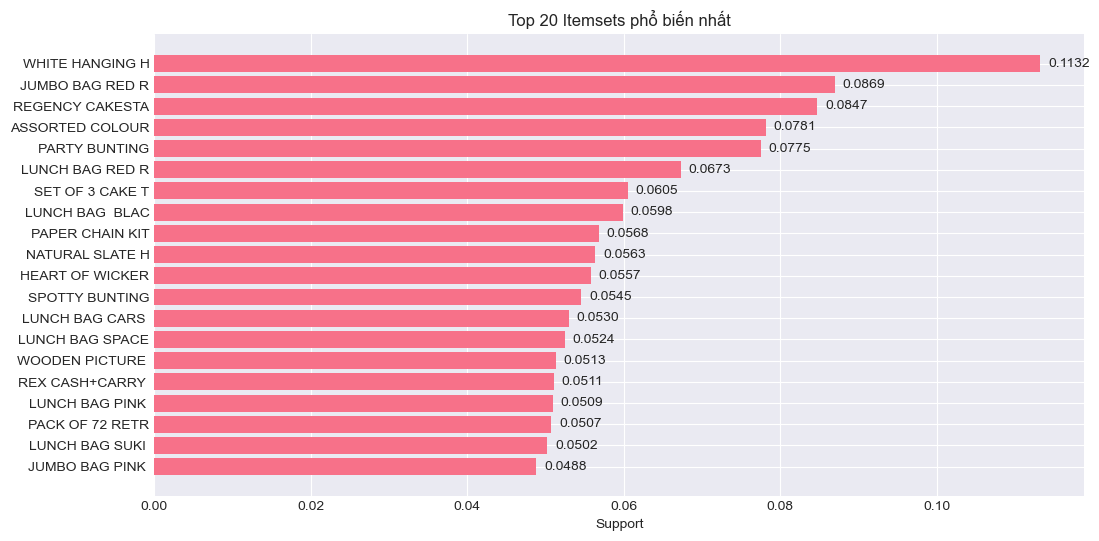

In [7]:
# Khởi tạo DataVisualizer
visualizer = DataVisualizer()

# 1. Vẽ biểu đồ top itemset FP-Growth
print("\n=== BIỂU ĐỒ TOP 20 ITEMSET PHỔ BIẾN (FP-Growth) ===")
visualizer.plot_top_itemsets(frequent_itemsets_fp, top_n=20)


=== BIỂU ĐỒ TOP 15 LUẬT THEO LIFT (FP-Growth) ===


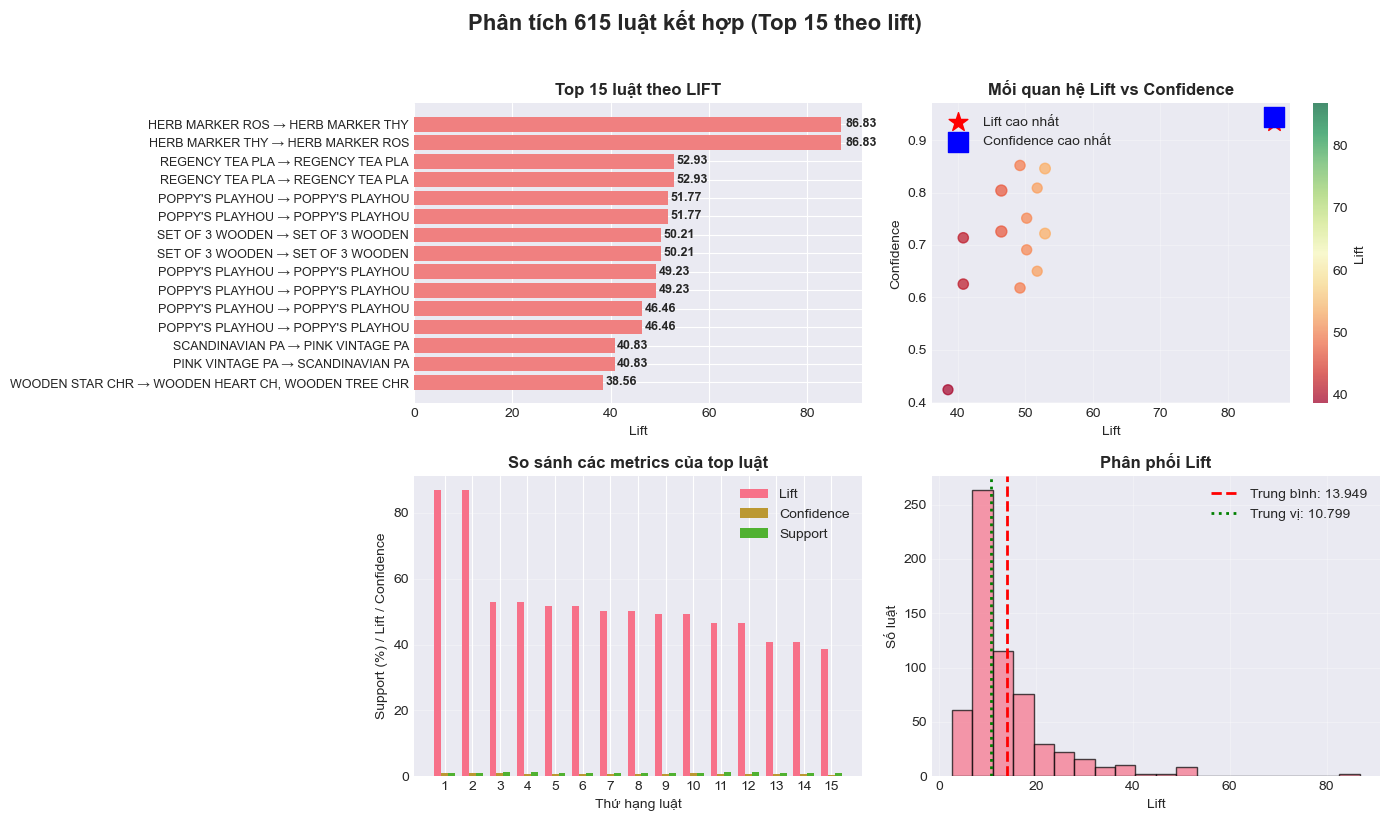

Tổng số luật: 615
Lift trung bình: 13.949
Lift cao nhất: 86.829
Lift thấp nhất: 2.692
Confidence trung bình: 0.500
Support trung bình: 0.0141


In [8]:
# 2. Vẽ biểu đồ top luật theo lift (FP-Growth)
print("\n=== BIỂU ĐỒ TOP 15 LUẬT THEO LIFT (FP-Growth) ===")
visualizer.plot_top_rules(rules_fp, top_n=15, metric='lift')


=== BIỂU ĐỒ PHÂN TÁN: SUPPORT VS CONFIDENCE (FP-Growth) ===


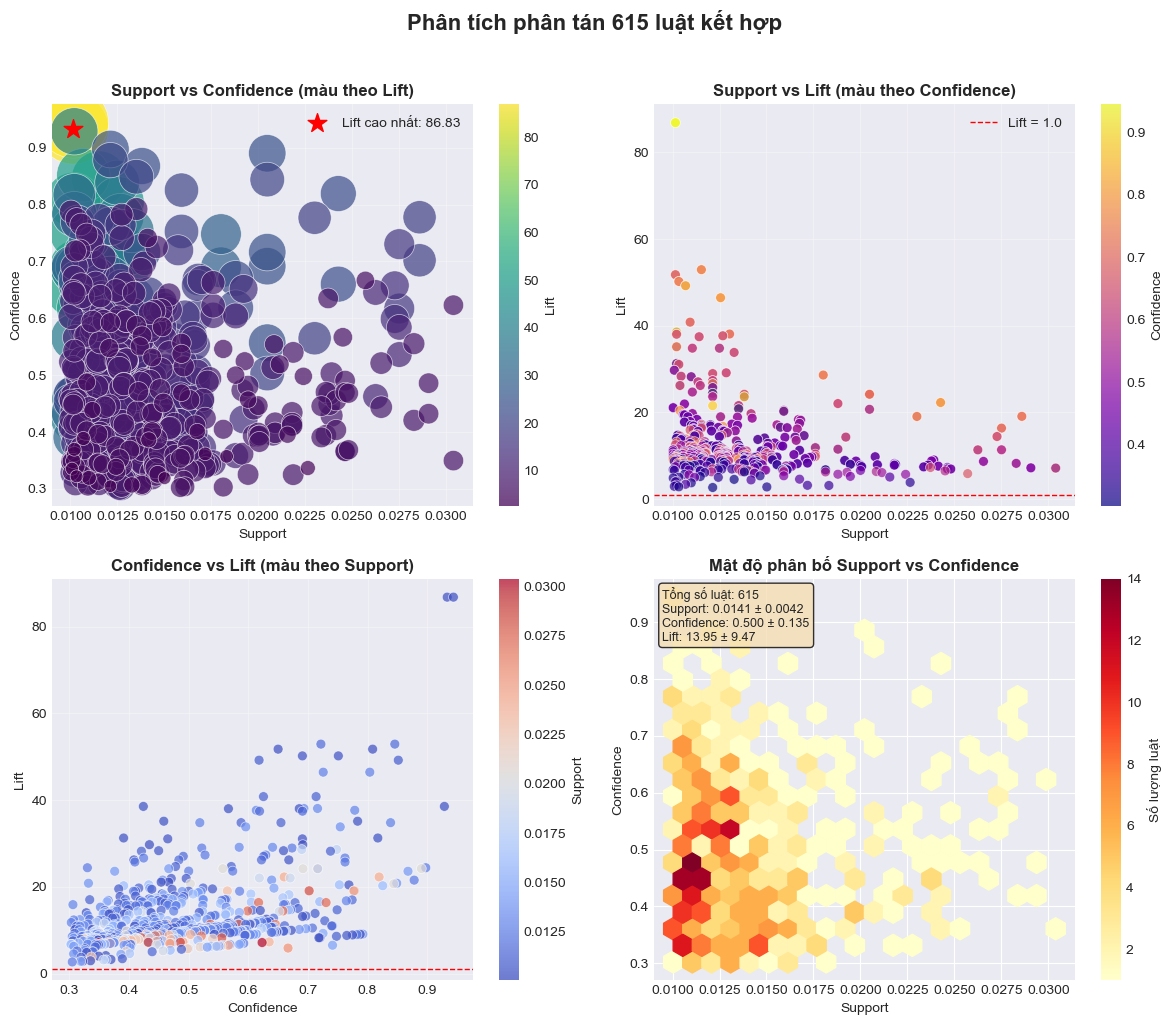

Hệ số tương quan giữa các metrics:
  Support vs Confidence: -0.016
  Support vs Lift: -0.213
  Confidence vs Lift: 0.504


In [9]:
# 3. Vẽ scatter plot support vs confidence (FP-Growth)
print("\n=== BIỂU ĐỒ PHÂN TÁN: SUPPORT VS CONFIDENCE (FP-Growth) ===")
visualizer.plot_scatter_rules(rules_fp)


=== NETWORK GRAPH CỦA CÁC LUẬT (FP-Growth) ===


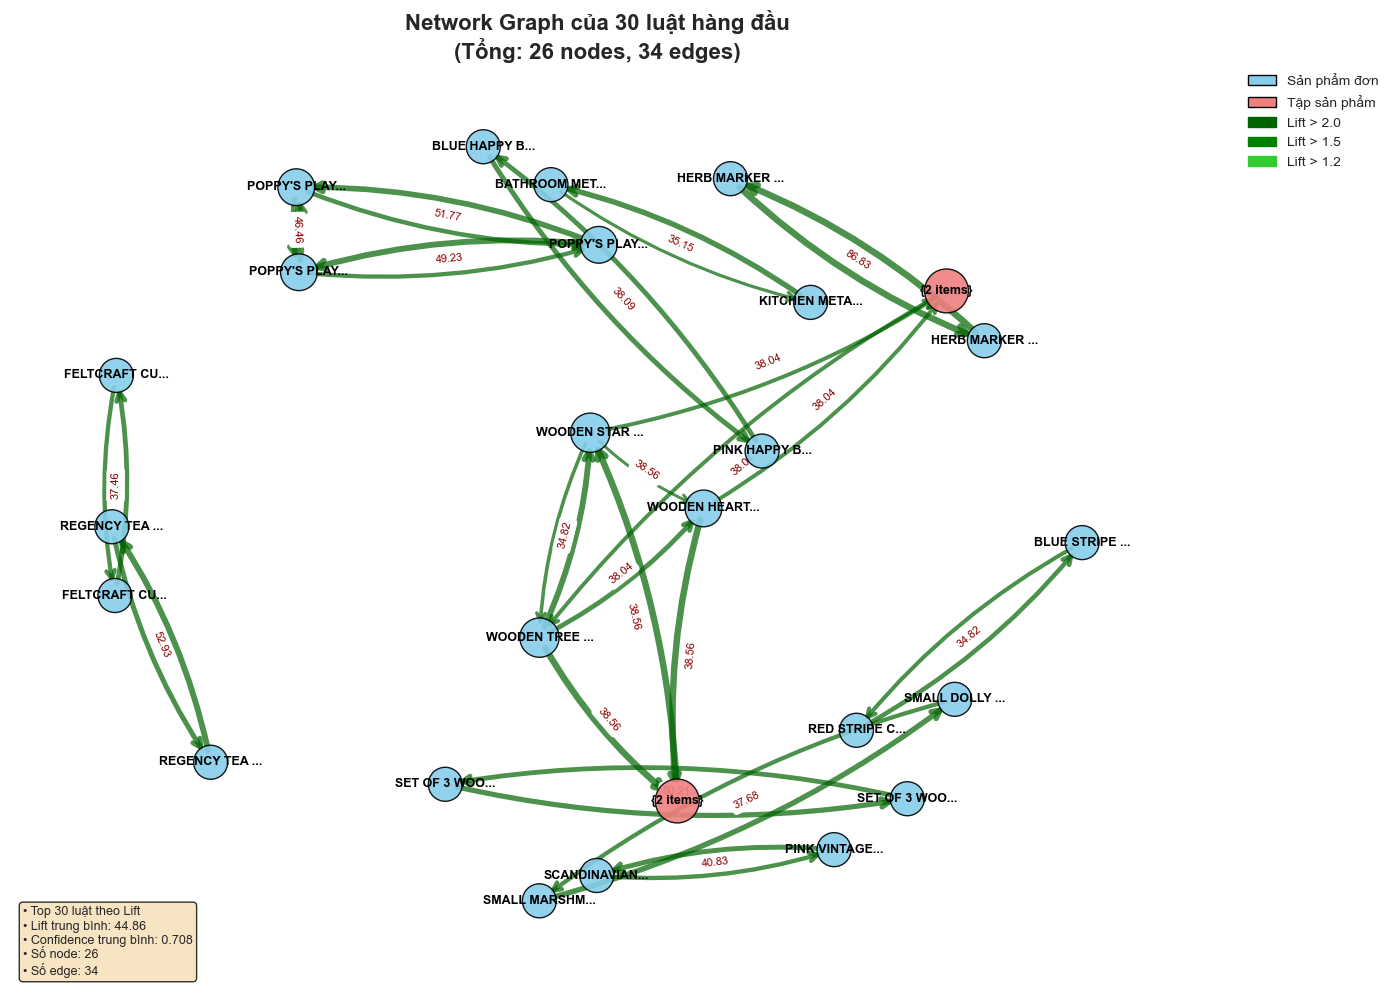

Đã tạo network graph với 26 nodes và 34 edges
Top 5 sản phẩm có nhiều kết nối nhất:
  • WOODEN STAR CHRISTMAS SCANDINAVIAN: 5 kết nối
  • WOODEN TREE CHRISTMAS SCANDINAVIAN: 5 kết nối
  • POPPY'S PLAYHOUSE LIVINGROOM : 4 kết nối
  • POPPY'S PLAYHOUSE BEDROOM : 4 kết nối
  • POPPY'S PLAYHOUSE KITCHEN: 4 kết nối


<Figure size 640x480 with 0 Axes>

In [10]:
# 4. Vẽ network graph (FP-Growth)
print("\n=== NETWORK GRAPH CỦA CÁC LUẬT (FP-Growth) ===")
visualizer.plot_network_graph(rules_fp, top_n=30)

In [11]:
# PHÂN TÍCH VÀ RÚT RA INSIGHT

print("\n" + "="*60)
print("PHÂN TÍCH VÀ INSIGHT KINH DOANH TỪ FP-GROWTH")
print("="*60)

# 1. Tìm sản phẩm xuất hiện nhiều nhất trong luật
print("\n1. PHÂN TÍCH SẢN PHẨM TRUNG TÂM (HUB) - FP-GROWTH:")

product_counts_fp = {}
for _, row in rules_fp.iterrows():
    for product in row['antecedents']:
        product_counts_fp[product] = product_counts_fp.get(product, 0) + 1
    for product in row['consequents']:
        product_counts_fp[product] = product_counts_fp.get(product, 0) + 1

# Sắp xếp và lấy top 10
sorted_products_fp = sorted(product_counts_fp.items(), key=lambda x: x[1], reverse=True)

print("\nTop 10 sản phẩm xuất hiện nhiều nhất trong các luật (FP-Growth):")
for i, (product, count) in enumerate(sorted_products_fp[:10], 1):
    print(f"{i}. {product}: {count} lần")


PHÂN TÍCH VÀ INSIGHT KINH DOANH TỪ FP-GROWTH

1. PHÂN TÍCH SẢN PHẨM TRUNG TÂM (HUB) - FP-GROWTH:

Top 10 sản phẩm xuất hiện nhiều nhất trong các luật (FP-Growth):
1. LUNCH BAG RED RETROSPOT: 106 lần
2. LUNCH BAG  BLACK SKULL.: 90 lần
3. LUNCH BAG CARS BLUE: 76 lần
4. LUNCH BAG PINK POLKADOT: 75 lần
5. LUNCH BAG SPACEBOY DESIGN : 70 lần
6. LUNCH BAG SUKI DESIGN : 63 lần
7. LUNCH BAG WOODLAND: 61 lần
8. JUMBO BAG RED RETROSPOT: 51 lần
9. LUNCH BAG APPLE DESIGN: 40 lần
10. JUMBO BAG PINK POLKADOT: 34 lần


In [12]:
# 2. Phân tích luật mạnh
print("\n2. PHÂN TÍCH CÁC LUẬT MẠNH (FP-Growth):")
print("   (Support > 0.02, Confidence > 0.5, Lift > 2)")

strong_rules_fp = rules_fp[
    (rules_fp['support'] > 0.02) & 
    (rules_fp['confidence'] > 0.5) & 
    (rules_fp['lift'] > 2)
]

print(f"\nTìm thấy {len(strong_rules_fp)} luật mạnh (FP-Growth):")

if len(strong_rules_fp) > 0:
    for i, (idx, row) in enumerate(strong_rules_fp.head(5).iterrows(), 1):
        antecedents = ', '.join(list(row['antecedents']))
        consequents = ', '.join(list(row['consequents']))
        print(f"\n{i}. {antecedents} → {consequents}")
        print(f"   Support: {row['support']:.3f}, Confidence: {row['confidence']:.3f}, Lift: {row['lift']:.3f}")
else:
    print("Không tìm thấy luật nào đạt tất cả ngưỡng trên")


2. PHÂN TÍCH CÁC LUẬT MẠNH (FP-Growth):
   (Support > 0.02, Confidence > 0.5, Lift > 2)

Tìm thấy 30 luật mạnh (FP-Growth):

1. PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER  → GREEN REGENCY TEACUP AND SAUCER
   Support: 0.020, Confidence: 0.890, Lift: 24.217

2. GREEN REGENCY TEACUP AND SAUCER → PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER 
   Support: 0.020, Confidence: 0.557, Lift: 24.217

3. PINK REGENCY TEACUP AND SAUCER → GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER 
   Support: 0.020, Confidence: 0.692, Lift: 24.189

4. GREEN REGENCY TEACUP AND SAUCER, ROSES REGENCY TEACUP AND SAUCER  → PINK REGENCY TEACUP AND SAUCER
   Support: 0.020, Confidence: 0.716, Lift: 24.189

5. GREEN REGENCY TEACUP AND SAUCER → PINK REGENCY TEACUP AND SAUCER
   Support: 0.024, Confidence: 0.660, Lift: 22.289


In [13]:
# 3. So sánh với kết quả từ Apriori (Lab 1)
print("\n" + "="*60)
print("SO SÁNH VỚI KẾT QUẢ APRIORI (LAB 1)")
print("="*60)

# Tải kết quả từ Apriori
try:
    rules_apriori = pd.read_csv('../data/association_rules.csv')
    print(f"- Apriori tìm được: {len(rules_apriori)} luật")
    print(f"- FP-Growth tìm được: {len(rules_fp)} luật")
    
    if len(rules_apriori) > 0 and len(rules_fp) > 0:
        # So sánh top 5 luật
        print("\nTOP 5 LUẬT TỪ MỖI THUẬT TOÁN:")
        
        print("\nApriori (top 5 by lift):")
        top_apriori = rules_apriori.nlargest(5, 'lift')
        for i, (idx, row) in enumerate(top_apriori.iterrows(), 1):
            antecedents = eval(row['antecedents']) if isinstance(row['antecedents'], str) else row['antecedents']
            consequents = eval(row['consequents']) if isinstance(row['consequents'], str) else row['consequents']
            antecedents_str = ', '.join(list(antecedents))
            consequents_str = ', '.join(list(consequents))
            print(f"{i}. {antecedents_str} → {consequents_str}")
            print(f"   Lift: {row['lift']:.2f}")
        
        print("\nFP-Growth (top 5 by lift):")
        top_fp = rules_fp.nlargest(5, 'lift')
        for i, (idx, row) in enumerate(top_fp.iterrows(), 1):
            antecedents = ', '.join(list(row['antecedents']))
            consequents = ', '.join(list(row['consequents']))
            print(f"{i}. {antecedents} → {consequents}")
            print(f"   Lift: {row['lift']:.2f}")
        
except FileNotFoundError:
    print("Chưa có kết quả từ Apriori. Vui lòng chạy Lab 1 trước.")


SO SÁNH VỚI KẾT QUẢ APRIORI (LAB 1)
Chưa có kết quả từ Apriori. Vui lòng chạy Lab 1 trước.


In [14]:
# 4. Đề xuất kinh doanh từ FP-Growth
print("\n" + "="*60)
print("ĐỀ XUẤT KINH DOANH TỪ FP-GROWTH")
print("="*60)

print("\nDựa trên phân tích FP-Growth, đề xuất các chiến lược sau:")
print("\n1. COMBO SẢN PHẨM NÊN TẠO (dựa trên luật có lift cao):")

# Lấy top 5 luật có lift cao nhất
top_5_rules = rules_fp.nlargest(5, 'lift')

for i, (idx, row) in enumerate(top_5_rules.iterrows(), 1):
    antecedents = ', '.join(list(row['antecedents']))
    consequents = ', '.join(list(row['consequents']))
    print(f"   {i}. Combo '{antecedents} + {consequents}'")
    print(f"      - Lift: {row['lift']:.2f} (khả năng mua cùng cao gấp {row['lift']:.1f}x)")
    print(f"      - Confidence: {row['confidence']:.1%} (nếu mua {antecedents} thì {row['confidence']:.1%} mua {consequents})")
    print(f"      - Support: {row['support']:.2%} ({row['support']*basket_bool.shape[0]:.0f} giao dịch)")

print("\n2. VỊ TRÍ TRƯNG BÀY ƯU TIÊN:")
print("   • Đặt các sản phẩm hub gần nhau:")
for product, count in sorted_products_fp[:3]:
    print(f"     - {product} (xuất hiện trong {count} luật)")

print("\n3. CHIẾN DỊCH MARKETING ĐỀ XUẤT:")
print("   • Chương trình 'Mua X được giảm giá Y' cho các cặp có confidence > 50%")
print("   • Gói combo ưu đãi cho các bộ 3 sản phẩm thường mua cùng")
print("   • Email marketing gợi ý sản phẩm dựa trên lịch sử mua hàng")


ĐỀ XUẤT KINH DOANH TỪ FP-GROWTH

Dựa trên phân tích FP-Growth, đề xuất các chiến lược sau:

1. COMBO SẢN PHẨM NÊN TẠO (dựa trên luật có lift cao):
   1. Combo 'HERB MARKER ROSEMARY + HERB MARKER THYME'
      - Lift: 86.83 (khả năng mua cùng cao gấp 86.8x)
      - Confidence: 93.4% (nếu mua HERB MARKER ROSEMARY thì 93.4% mua HERB MARKER THYME)
      - Support: 1.02% (169 giao dịch)
   2. Combo 'HERB MARKER THYME + HERB MARKER ROSEMARY'
      - Lift: 86.83 (khả năng mua cùng cao gấp 86.8x)
      - Confidence: 94.4% (nếu mua HERB MARKER THYME thì 94.4% mua HERB MARKER ROSEMARY)
      - Support: 1.02% (169 giao dịch)
   3. Combo 'REGENCY TEA PLATE GREEN  + REGENCY TEA PLATE ROSES '
      - Lift: 52.93 (khả năng mua cùng cao gấp 52.9x)
      - Confidence: 84.6% (nếu mua REGENCY TEA PLATE GREEN  thì 84.6% mua REGENCY TEA PLATE ROSES )
      - Support: 1.15% (192 giao dịch)
   4. Combo 'REGENCY TEA PLATE ROSES  + REGENCY TEA PLATE GREEN '
      - Lift: 52.93 (khả năng mua cùng cao gấp 52.9x)

In [15]:
# 5. Lưu kết quả FP-Growth
print("\n" + "="*60)
print("LƯU KẾT QUẢ FP-GROWTH")
print("="*60)

# Lưu tập phổ biến
frequent_itemsets_fp.to_csv('../data/processed/cleaned_uk_data.csv', index=False)
print(f"Đã lưu {len(frequent_itemsets_fp)} tập phổ biến vào: ../data/fp_growth_itemsets.csv")

# Lưu luật kết hợp
fpgrowth_miner.save_rules('../data/processced/rules_apriori_filtered.csv')

print("\nHOÀN THÀNH PHÂN TÍCH FP-GROWTH!")


LƯU KẾT QUẢ FP-GROWTH
Đã lưu 970 tập phổ biến vào: ../data/fp_growth_itemsets.csv
✅ Đã lưu 615 luật FP-Growth vào: ../data/processced/rules_apriori_filtered.csv

HOÀN THÀNH PHÂN TÍCH FP-GROWTH!
